In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

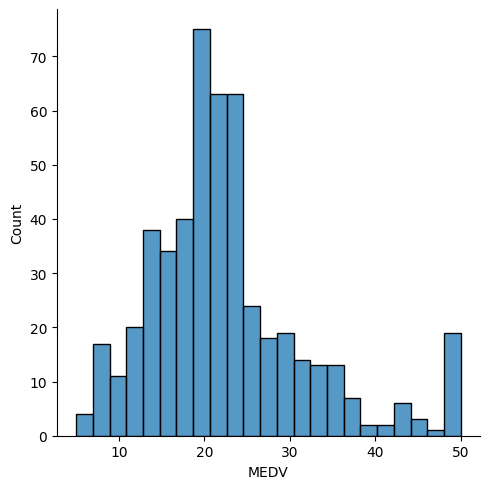

In [13]:
sns.displot(df.MEDV)

<Axes: ylabel='count'>

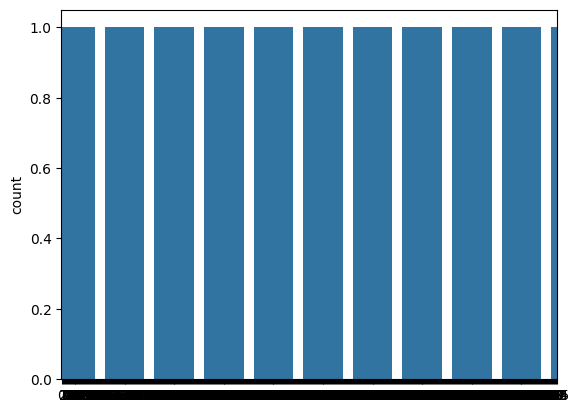

In [14]:
sns.countplot(df.MEDV)

<Axes: ylabel='MEDV'>

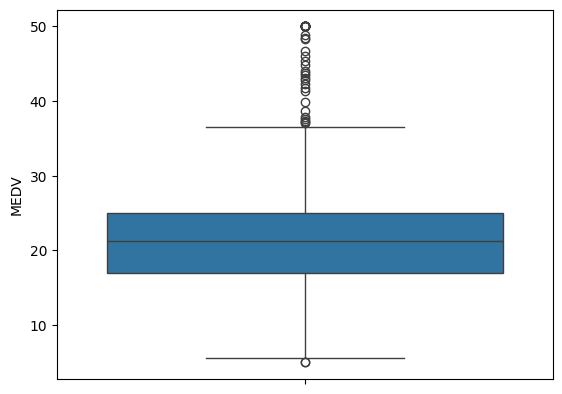

In [15]:
sns.boxplot(df.MEDV)

In [16]:
corr = df.corr()
corr.loc['MEDV']

CRIM      -0.379695
ZN         0.365943
INDUS     -0.478657
CHAS       0.179882
NOX       -0.427321
RM         0.695360
AGE       -0.380223
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.721975
MEDV       1.000000
Name: MEDV, dtype: float64

<Axes: >

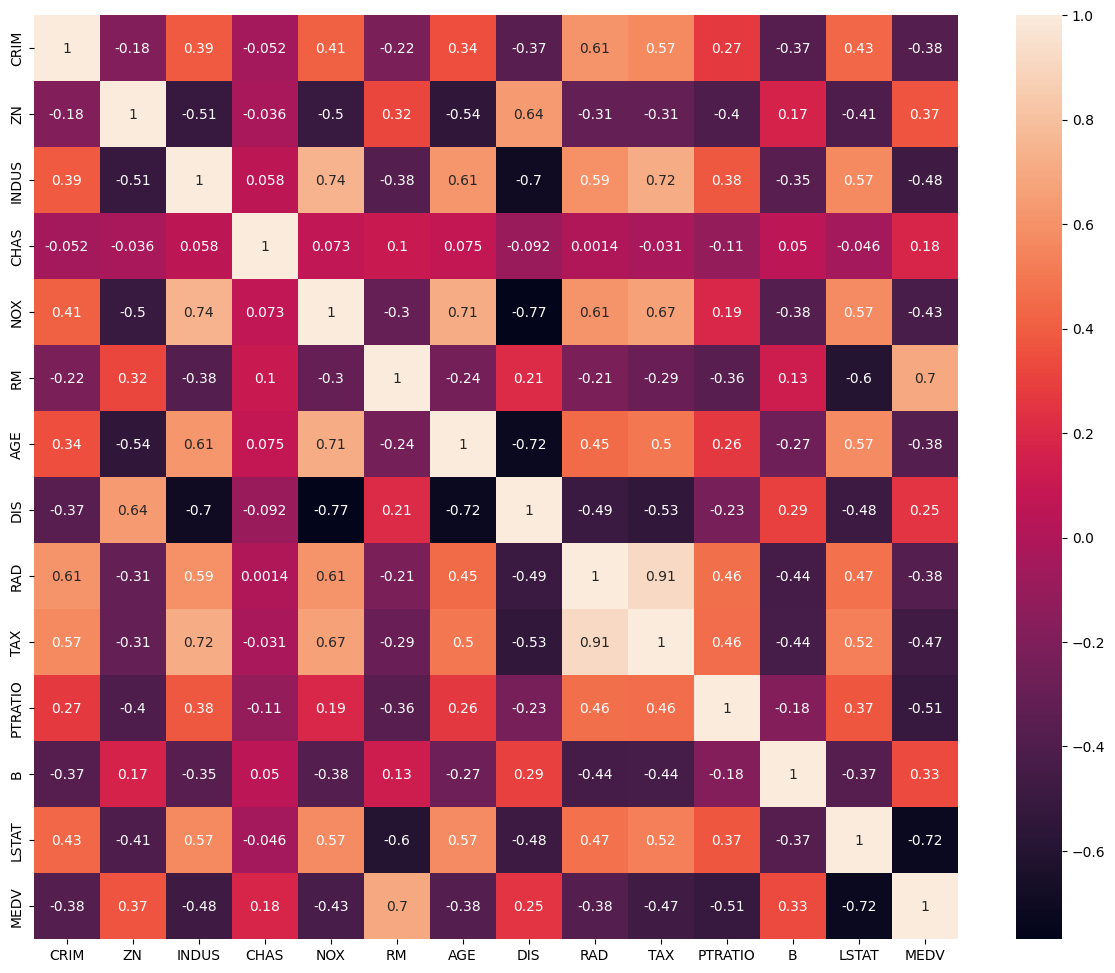

In [17]:
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(corr,square = True, annot=True)

In [18]:
X=df.iloc[:, :-1]
y = df.MEDV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

In [23]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print("rmse: ",rmse)

rmse:  5.0017668901941725


In [27]:
r2 = r2_score(y_test, y_pred)
print("r2: ",r2)

r2:  0.6588520195508143


In [34]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = 13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

In [39]:
model.compile(
    optimizer = 'adam',
    loss='mean_squared_error', metrics=['mae']
)

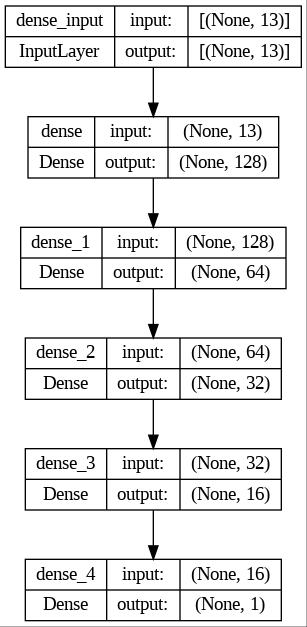

In [42]:
!pip install pydot
import pydot
keras.utils.plot_model(model, to_file='model.jpg', show_shapes=True, show_layer_names=True)

In [43]:
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 5s 42ms/step - loss: 596.5475 - mae: 22.5122 - val_loss: 492.8455 - val_mae: 20.6801
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 538.9596 - mae: 21.1324 - val_loss: 412.6835 - val_mae: 18.6532
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 420.8169 - mae: 18.0859 - val_loss: 259.3723 - val_mae: 14.0445
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 225.0955 - mae: 12.5652 - val_loss: 81.8346 - val_mae: 6.6054
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 82.5099 - mae: 7.0874 - val_loss: 64.7851 - val_mae: 5.3301
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 49.9375 - mae: 5.3233 - val_loss: 59.1467 - val_mae: 4.7183
Epoch 7/100
12/12 [==============================] - 0s 11ms/step - loss: 33.1572 - mae: 4.1422 - val_loss: 55.3557 - val_mae: 4.7004
Epoch 8/100
12/12 [=============================

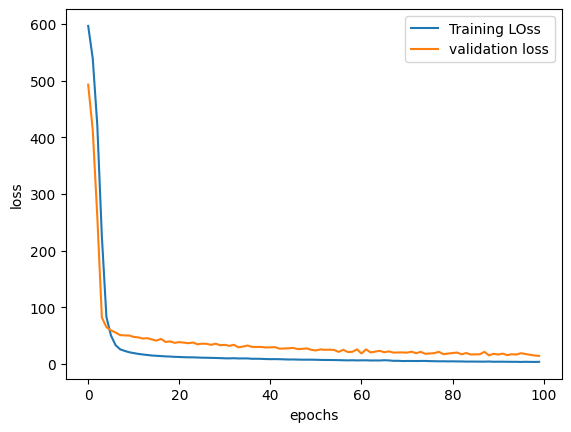

In [44]:
plt.plot(history.history['loss'], label='Training LOss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
y_pred = model.predict(X_test)
mse_NN, mea_NN = model.evaluate(X_test, y_test)
print(mse_NN)
print(mea_NN)

4/4 [==============================] - 0s 6ms/step - loss: 12.3168 - mae: 2.3014
12.316801071166992
2.3013978004455566


In [48]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_pred_l = l_model.predict(X_test)
mse_l = mean_absolute_error(y_test,y_pred_l)
mae_l = mean_squared_error(y_test,y_pred_l)
print(mse_l)
print(mae_l)

3.1499233573458025
25.017672023842852


In [50]:
r2 = r2_score(y_test,y_pred_l)
print(r2)

0.658852019550812


In [51]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred_l)))
print(rmse)

5.001766890194189


In [54]:
import sklearn

In [55]:
new_data = scaler.transform([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]])
prediction = model.predict(new_data)

1/1 [==============================] - 0s 41ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
print(prediction)

[[13.714519]]
